In [1]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, naive_bayes, tree, svm, ensemble
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
from xgboost import XGBRegressor

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/KC_housePrice/'
filename01 = 'kc_house_data.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
df_full.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df_full.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [11]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_num = df_full[cols]

minmax_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', #拿掉zipcode
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

for col in minmax_cols:
    scaler = MinMaxScaler()
    scaler.fit(df_num[col].values.reshape(-1, 1))
    df_num[col] = scaler.transform(df_num[col].values.reshape(-1, 1))
    
p_scaler = MinMaxScaler()
p_scaler.fit(df_num['price'].values.reshape(-1, 1))
df_num['price'] = p_scaler.transform(df_num['price'].values.reshape(-1, 1))


df_num = pd.get_dummies(df_num, columns=['zipcode'])

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,...,0,0,0,0,0,0,1,0,0,0
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,...,0,0,0,0,0,0,0,0,0,0
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,...,0,0,0,0,0,0,0,0,0,0
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,...,0,0,0,0,0,0,0,0,0,0
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Data preprocessing
from sklearn.utils import shuffle

shuffle_df = shuffle(df_num, random_state=42)

df_label = shuffle_df['price']
df_feature = shuffle_df.drop('price', axis=1)

cut_point = round(len(df_num)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

# Scikit-Learn

In [14]:
## tree.DecisionTreeRegressor()
from sklearn import cross_validation, tree
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=tree.DecisionTreeRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.999499
Testing Score:0.765737


0.25120004515339039

In [15]:
### svm.LinearSVR()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                                                  test_size=0.25, random_state=0)
regr=svm.LinearSVR()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.773419
Testing Score:0.745703


0.22163226051203525

In [16]:
### ensemble.AdaBoostRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                                                  test_size=0.25, random_state=0)
regr=ensemble.AdaBoostRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.228179
Testing Score:0.238159


1.1438836452705718

In [86]:
### ensemble.GradientBoostingRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                                                  test_size=0.25, random_state=0)
regr=ensemble.GradientBoostingRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.914783
Testing Score:0.877460


0.20587734294095589

In [90]:
### ensemble.RandomForestRegressor()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                                test_size=0.25, random_state=0)
regr=ensemble.RandomForestRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.972302
Testing Score:0.856844


0.19024343468167751

In [81]:
# XGBRegressor
from xgboost import XGBRegressor
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label,
                                          test_size=0.25,random_state=0) #分層取樣
regr=XGBRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.910821
Testing Score:0.873735


0.20623351834388065

In [91]:
real = p_scaler.inverse_transform(test_label.reshape(-1,1)).reshape(-1)
ans = p_scaler.inverse_transform(regr.predict(test_feature).reshape(-1,1)).reshape(-1)

df_ans = pd.DataFrame({'real':real,'ans':ans }, 
                      index = range(len(real))
                      )
df_ans.head()

,ans,real
0,2.888338e+05,230000.0
1,6.662170e+05,713000.0
2,3.515175e+05,315000.0
3,6.574667e+05,379900.0
4,1.059171e+06,1100000.0


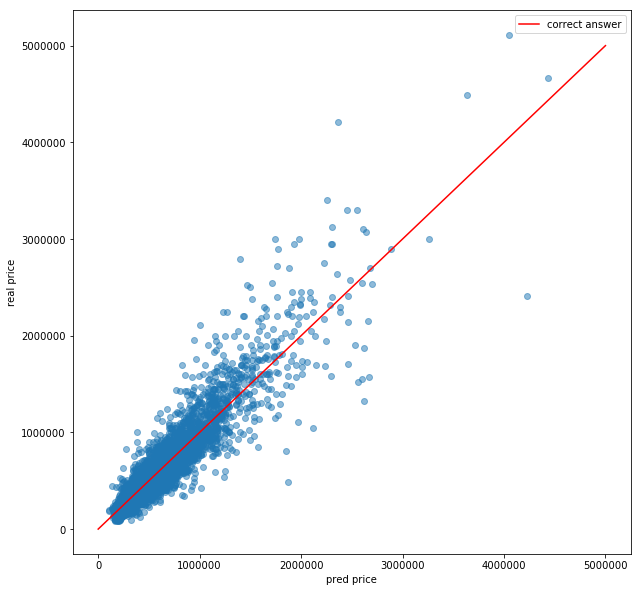

In [143]:
plt.figure(figsize=(10,10))
plt.scatter(ans, real, alpha=0.5)
plt.xlabel('pred price')
plt.ylabel('real price')

x=np.linspace(0,5000000,100)
y=x

plt.plot(x,y, c='red', label='correct answer')
plt.legend()
plt.show()

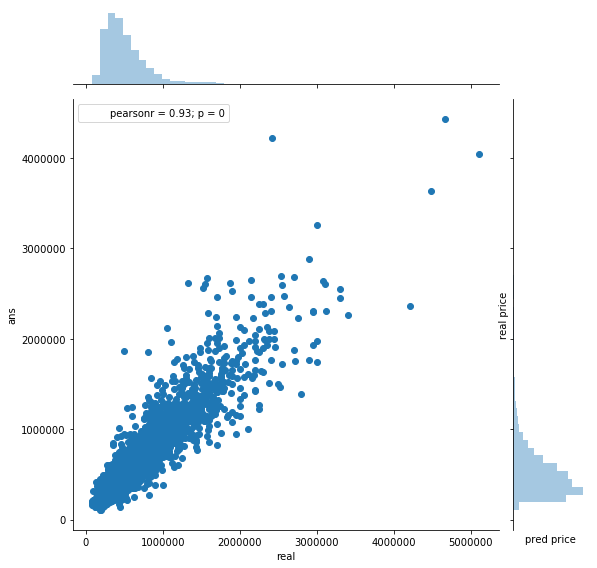

In [139]:
plt.figure(figsize=(10,10))
sns.jointplot('real','ans',data=df_ans, size=8)
plt.xlabel('pred price')
plt.ylabel('real price')

plt.show()

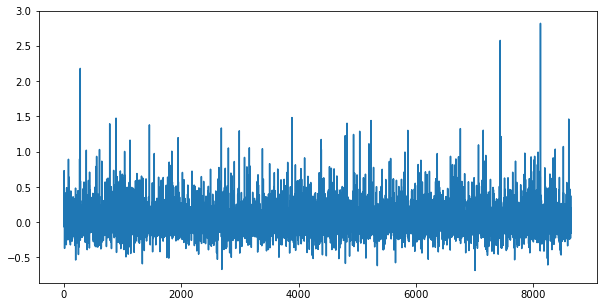

0.13858608505266715

In [127]:
plt.figure(figsize=(10,5))
plt.plot(range(len(real)), (ans-real)/real)
plt.show()

np.mean(np.abs((ans-real)/real))

In [94]:
df_ans['ans'].corr(df_ans['real'])

0.92968093327194179

# Keras: MLP，效果穩定比ensemble還差

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1000)              87000     
_________________________________________________________________
dropout_28 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 400)               400400    
_________________________________________________________________
dropout_29 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_30 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
Total para

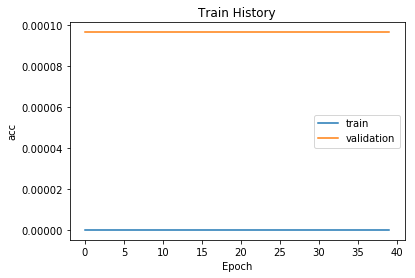

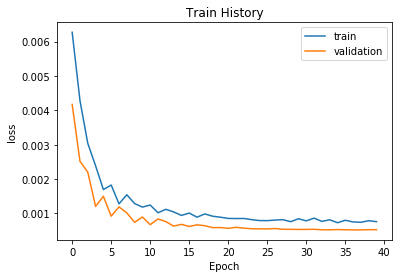

8544/8645 [============================>.] - ETA: 0s

accuracy= 0.0


In [121]:
### Keras MLP models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
model.add(Dense(units=1000, 
                input_dim=86, 
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=400,  
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=100,  
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                ))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=40, 
                          batch_size=2000, verbose=2) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict(test_feature)

In [122]:
# Train/Test Score，接續後面的confusion matrix
real = p_scaler.inverse_transform(test_label.reshape(-1,1)).reshape(-1)
ans2 = p_scaler.inverse_transform(prediction.reshape(-1,1)).reshape(-1)

df_ans2 = pd.DataFrame({'real':real,'ans':ans2 }, 
                      index = range(len(real))
                      )
df_ans2.head()

,ans,real
0,192319.84375,230000.0
1,612252.31250,713000.0
2,276880.93750,315000.0
3,563177.43750,379900.0
4,910415.56250,1100000.0


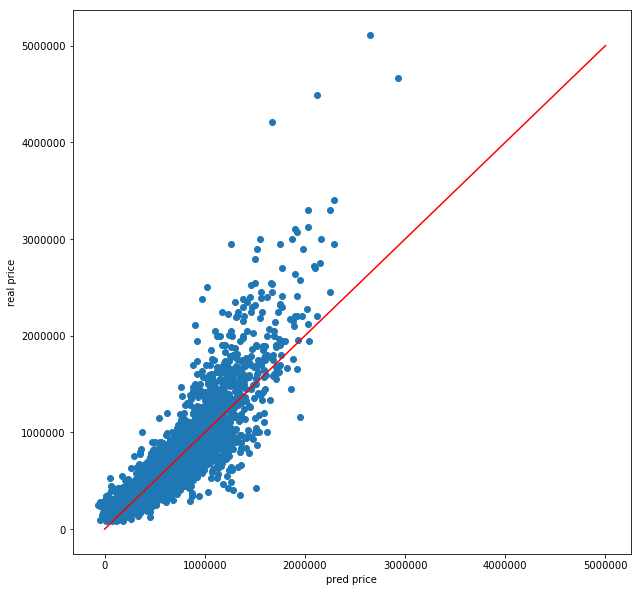

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(ans2, real)
plt.xlabel('pred price')
plt.ylabel('real price')

x=np.linspace(0,5000000,100)
y=x

plt.plot(x,y, c='red', label='correct answer')
plt.show()

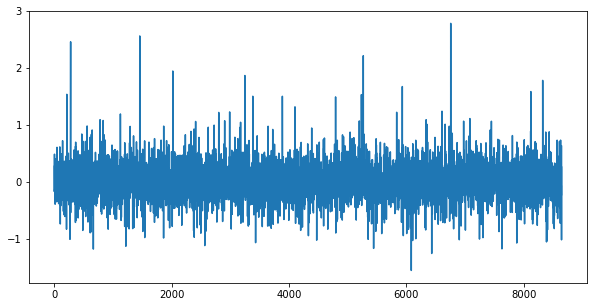

0.18963831714529647

In [125]:
plt.figure(figsize=(10,5))
plt.plot(range(len(real)), (ans2-real)/real)
plt.show()

np.mean(np.abs((ans2-real)/real))

In [120]:
df_ans2['ans'].corr(df_ans2['real'])

0.89304438555544596